Name: Han Chen, Daniel Fernandez Davila

### Models
I. Baseline Model
1. First tried to classify with Lexicon list of Positive and Negative Words from previous Sentiment Analysis Models. 
2. Count the occurrences of Positive and Negative Words and classify the tweet accordingly (Net sum positive as +1, otherwise -1)   
3. The accuracy of this baseline model is 46.54%, lower than a random guess. 
So we decided to use the random guess as our baseline model, simple and easy.   

II. Other models
1. We tried three ways to construct our features:  
   (1) Bag of Words using CountVectorizer  
       Bag of Words simply count the number of occurance of each word in the text corpus.Each word becomes a feature, and the number of occurance is the value.  
   (2) TFIDF   
       TFIDF also weight each word in the document based on the appearance in the document. This not only reflects the importance of words in the text, but also normalizes each vector.  
   (3) Word Embeddings  
       Word Embeddings yield the best test accuracy of the models, so we decided to use that for feature selection. We thought the reason might be that word embeddings are capable to capturing the semantic meaning of the words. In our project, each text is converted into a 200 length vector. (In the word embedding approach notebook) 
2. PCA was applied before running models. Best n_components was chosen by the maximum variance explained of the data.
3. We then implemented the models by first chose hyperparameters by grid search/cross validation, and then trained and tested with 75%/25% training and test split.   
    Majority voting was introduced to combine all learner together and predict the test data to be the majority vote of each learner. 

### Baseline Model

In [126]:
negative = pd.read_csv('Datasets/List_of_Words/negative-wordscopy.txt', encoding="ISO-8859-1", header = None)
positive = pd.read_csv('Datasets/List_of_Words/positive-wordscopy.txt', encoding="ISO-8859-1", header = None)

In [127]:
data.head()

,Unnamed: 0,open,close,change (%),movement,text,count
0,2017-04-23 00:00:00,1345.366757,1342.639048,-0.202748,-1,"#Banks vs #cryptocurrency war: Bitfinex, OKcoi...",3
1,2017-04-23 12:00:00,1341.000005,1352.193569,0.834718,1,Bitcoin Origins RT @CHalexov2016: Time to buy ...,11
2,2017-04-24 00:00:00,1352.193569,1336.419090,-1.166584,-1,The end of cash: It a Bit harder to trace onli...,4
3,2017-04-24 12:00:00,1336.020000,1347.399011,0.851710,1,#BitcoinUnlimited is production ready guys. RT...,13
4,2017-04-25 00:00:00,1346.862890,1364.896000,1.338897,1,RT @btc_manager: Character Assassins for Hire:...,5


In [128]:
for i in range(len(data)):
    data.iloc[i,5] = data.iloc[i,5].lower()

In [129]:
data['prediction'] = -1

In [130]:
import time
start_time = time.time()
for i in range(len(data)):
    #print(i)
    if sum(data.iloc[i,5].count(x) for x in negative[0]) > sum(data.iloc[i,5].count(x) for x in positive[0]):
        data.iloc[i,7] = -1
    elif sum(data.iloc[i,5].count(x) for x in negative[0]) < sum(data.iloc[i,5].count(x) for x in positive[0]):
        data.iloc[i,7] = 1

63.59047198295593


In [131]:
print("Baseline accuracy:",accuracy_score(data['movement'], data['prediction']))

Baseline accuracy: 0.4654178674351585


## Other Machine Learning Models (using Bag Of Words) 

#### Load Data

In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv('data_to_ml_models.csv',encoding='utf-8')

In [25]:
data.columns = ['time','open','close','change (%)','movement','text','count']

In [26]:
data.tail()

,time,open,close,change (%),movement,text,count
1382,2018-04-03 18:00:00,7419.388173,7412.270339,-0.095936,-1,Never Miss Any Critical Bitcoin Related News A...,172
1383,2018-04-04 00:00:00,7406.145999,7347.608797,-0.790387,-1,Every Wed hosts @MattAaron &amp; @NickyPapersN...,115
1384,2018-04-04 06:00:00,7358.884419,7054.051754,-4.142376,-1,@winrej68 Thanks for following Jerwin. Come jo...,71
1385,2018-04-04 12:00:00,7058.455973,6832.173030,-3.205842,-1,@Fullbeerbottle @CryptoCred Too bad they gotta...,150
1386,2018-04-04 18:00:00,6843.796444,6769.945088,-1.079099,-1,It here! The first ever mobile lightning walle...,144


In [27]:
# Creating document term matrix
# Bag of Words Approach
data = data.dropna()
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.9,
                                min_df=70,
                                stop_words='english')
tf_master = tf_vectorizer.fit_transform(data['text'])
print("Vocabulary Size:",tf_master.shape[1])

Vocabulary Size: 923


In [28]:
data3 = pd.DataFrame(tf_master.toarray())

In [29]:
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
# Normalizing with tweets counts
# for i in range(len(data3)):
#     if i != 41 and i != 169:
#         data3.iloc[i] = data3.iloc[i]/data['count'][i]
# data3.head()

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA

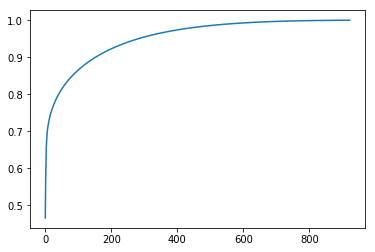

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA()
X_r = pca.fit(data3).transform(data3)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [31]:
pca = PCA(n_components=150)
X_r_final = pca.fit(data3).transform(data3)

In [32]:
data4 = pd.DataFrame(X_r_final)

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
data4, data['movement'], test_size = 0.25)

In [34]:
len(X_train)

1038

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Building an unpruned decision tree
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1.fit(X_train,y_train)
ypred_train = clf1.predict(X_train)
ypred_test = clf1.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))

Training Accuracy:  1.0
Test Accuracy:  0.4697406340057637


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[ 57,  97],
       [ 87, 106]])

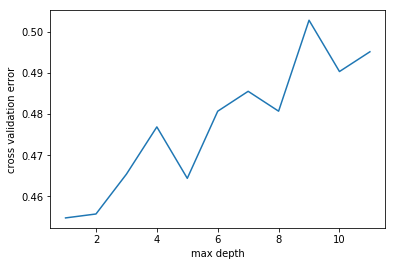

In [41]:
# choose hyperparameter max_depth using cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 5
param_values = np.arange(1,12,1)
scores = []

for depth in param_values:
    clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth)
    score = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv=5).mean()
    scores.append(score)
    
cross_val_error = [1-s for s in scores]
plt.plot(param_values, cross_val_error)
plt.xlabel('max depth')
plt.ylabel('cross validation error')
plt.show()

In [42]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=91)
clf = clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_dt))

Test accuracy: 0.484149855907781


### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_nb))

Test accuracy: 0.4783861671469741


### Logistic Regression

In [44]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(C=999999,penalty='l2',multi_class='multinomial',solver='lbfgs',random_state=91)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test, y_pred_lr)
print(cnf)
y_pred_train = lr.predict(X_train)
print("Training Accuracy: ",str(accuracy_score(y_train,y_pred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,y_pred_lr)))

[[ 60  94]
 [ 82 111]]
Training Accuracy:  0.638728323699422
Test Accuracy:  0.49279538904899134


### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators=200,max_features=50,bootstrap=True,criterion='entropy')
cl = cl.fit(X_train,y_train)
y_pred_rf = cl.predict(X_test)
print("Training accuracy:",accuracy_score(y_test,y_pred_rf))

Training accuracy: 0.5446685878962536


In [46]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'max_features':[3,5,10,15,25,35,45],'n_estimators':[50,100,200,300]}
clf_cv = RandomForestClassifier(bootstrap=True,criterion='entropy')
clf_cv = GridSearchCV(clf_cv,parameters)
clf_cv = clf_cv.fit(X_train,y_train)
y_pred_rf = clf_cv.predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_rf))
print(clf_cv.best_params_)

Test accuracy: 0.5360230547550432
{'max_features': 3, 'n_estimators': 200}


### Stacking

In [47]:
from collections import Counter
pred = pd.DataFrame({'Desision Tree': y_pred_dt,
              'Random Forest': y_pred_rf,
              'Naive Bayes': y_pred_nb,
              'Logistic Regression': y_pred_lr})
y_pred_stacking = []
for i in range(len(pred)):
    y_pred_stacking.append(Counter(pred.iloc[i]).most_common()[0][0])
pred['Stacking Prediction'] = y_pred_stacking
print("Test accuracy:",accuracy_score(y_test, y_pred_stacking))

Test accuracy: 0.49279538904899134


## Other Machine Learning Models (using TFIDF) 

In [48]:
data2 = data.dropna()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')
tfidf_vec = vectorizer.fit_transform(data2['text'])

In [50]:
data4 = pd.DataFrame(tfidf_vec.toarray())
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
data4, data2['movement'], test_size = 0.25)

### Decision Tree

In [51]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Building an unpruned decision tree
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1.fit(X_train,y_train)
ypred_train = clf1.predict(X_train)
ypred_test = clf1.predict(X_test)
print("Training Accuracy: ",str(accuracy_score(y_train,ypred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,ypred_test)))

Training Accuracy:  1.0
Test Accuracy:  0.5446685878962536


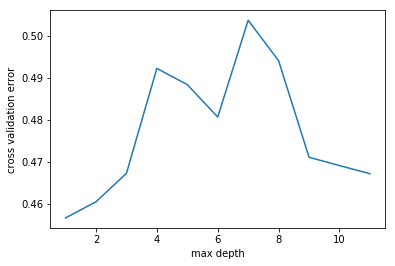

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 5
param_values = np.arange(1,12,1)
scores = []

for depth in param_values:
    clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=depth)
    score = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv=5).mean()
    scores.append(score)
    
cross_val_error = [1-s for s in scores]
plt.plot(param_values, cross_val_error)
plt.xlabel('max depth')
plt.ylabel('cross validation error')
plt.show()

In [53]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=91)
clf = clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_dt))

Test accuracy: 0.5590778097982709


### Naive Bayes

In [54]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_nb))

Test accuracy: 0.5043227665706052


### Logistic Regression

In [55]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(C=999999,penalty='l2',multi_class='multinomial',solver='lbfgs',random_state=91)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test, y_pred_lr)
print(cnf)
y_pred_train = lr.predict(X_train)
print("Training Accuracy: ",str(accuracy_score(y_train,y_pred_train)))
print("Test Accuracy: ",str(accuracy_score(y_test,y_pred_lr)))

[[ 72  81]
 [ 87 107]]
Training Accuracy:  1.0
Test Accuracy:  0.515850144092219


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators=100,max_features=10,bootstrap=True,criterion='entropy')
cl = cl.fit(X_train,y_train)
y_pred_rf = cl.predict(X_test)
print("Training accuracy:",accuracy_score(y_test,y_pred_rf))

Training accuracy: 0.5273775216138329


In [57]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'max_features':[30,60,90,120,150,200],'n_estimators':[50,100,200,300]}
clf_cv = RandomForestClassifier(bootstrap=True,criterion='entropy')
clf_cv = GridSearchCV(clf_cv,parameters)
clf_cv = clf_cv.fit(X_train,y_train)
y_pred_rf = clf_cv.predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_rf))
print(clf_cv.best_params_)

Test accuracy: 0.5446685878962536
{'max_features': 120, 'n_estimators': 200}


### Stacking

In [58]:
from collections import Counter
pred = pd.DataFrame({'Desision Tree': y_pred_dt,
              'Random Forest': y_pred_rf,
              'Naive Bayes': y_pred_nb,
              'Logistic Regression': y_pred_lr})
y_pred_stacking = []
for i in range(len(pred)):
    y_pred_stacking.append(Counter(pred.iloc[i]).most_common()[0][0])
pred['Stacking Prediction'] = y_pred_stacking
print("Test accuracy:",accuracy_score(y_test, y_pred_stacking))

Test accuracy: 0.5504322766570605
